<a href="https://colab.research.google.com/github/Pooooj/Covid-Detection/blob/main/Covid_case_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# installing the library for deploying AI models
!pip install gradio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.9 MB/s et

In [ ]:
# importing libraries
from IPython import display                                             # Enhanced interactive Python shell
import numpy as np                                                      # Numerical operations with arrays and matrices
import pandas as pd                                                     # Data manipulation and analysis library
import tensorflow as tf                                                 # framework that provides a wide range of tools and libraries for building and deploying machine learning models, particularly neural networks.
import os                                                               # It provides a way to interact with the file systems
import math                                                             # It is a built-in Python library that provides mathematical functions and utilities for numerical operations.

#Exploratory data analysis
import matplotlib.pyplot as plt                                         # library to create various types of visualizations, such as line plots, bar charts, histograms, and more.
import seaborn as sns                                                   # It is a data visualization library built on top of matplotlib, providing a high-level interface for creating attractive and informative statistical graphics
from tensorflow.keras.preprocessing.image import ImageDataGenerator     # It is a utility in TensorFlow for generating batches of image data with real-time data augmentation, including rescaling, resizing, rotation, and other transformations.
import cv2                                                              # It is a computer vision library that provides functions for image processing, such as reading, manipulating, and saving images
from PIL import ImageFilter                                             # It is part of the Python Imaging Library (PIL) and provides various image filters that can be applied to images, including blurring, sharpening, and edge enhancement.

#Model building
from tensorflow.keras.layers.experimental import preprocessing          # It is a module in TensorFlow that contains various preprocessing layers for data transformation and feature engineering in neural networks.
from sklearn.metrics import recall_score, confusion_matrix              # Libraries used for model evaluation

#Model deployment
import joblib                                                           # Library primarily used for saving and loading machine learning models.
import gradio as gr                                                     # Library for creating UIs for model deployment

#To generate reproducible results
import random as python_random                                          # to generate random data
np.random.seed(42)                                                      # setting the seed for Numpy random number generator
tf.random.set_seed(42)                                                  # setting the seed for Tensorflow random number generator

In [ ]:
# Importing using Google Colab

# Connecting Google Drive to this Python notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# extracting the data from the zipped file
!pip install gdown -q
!gdown 1qKvgJrY2nB__6wiGAqNWa1ABU5kO5QkX
!unzip "X-raydata.zip"


Downloading...
From (original): https://drive.google.com/uc?id=1qKvgJrY2nB__6wiGAqNWa1ABU5kO5QkX
From (redirected): https://drive.google.com/uc?id=1qKvgJrY2nB__6wiGAqNWa1ABU5kO5QkX&confirm=t&uuid=0213cda2-0b99-4f1e-9aaf-963f7b881d20
To: /content/X-raydata.zip
100% 147M/147M [00:00<00:00, 203MB/s]
Archive:  X-raydata.zip
  inflating: Data/.DS_Store          
   creating: Data/test/
   creating: Data/test/Covid/
  inflating: Data/test/Covid/0100.jpeg  
  inflating: Data/test/Covid/0102.jpeg  
  inflating: Data/test/Covid/0105.png  
  inflating: Data/test/Covid/0106.jpeg  
  inflating: Data/test/Covid/0108.jpeg  
  inflating: Data/test/Covid/0111.jpg  
  inflating: Data/test/Covid/0112.jpg  
  inflating: Data/test/Covid/0113.jpg  
  inflating: Data/test/Covid/0115.jpeg  
  inflating: Data/test/Covid/0118.jpeg  
  inflating: Data/test/Covid/0119.jpeg  
  inflating: Data/test/Covid/0120.jpg  
  inflating: Data/test/Covid/094.png  
  inflating: Data/test/Covid/096.png  
  inflating: Data/tes

In [ ]:
# defining the dimensions of the images
height, width = 224, 224
# defining how many images to load in one go
batch_size=64

def generate_data(DIR):
    # ImageDataGenerator is a function from tensorflow to perform rescaling, resizing, rotation, and other transformations.
    datagen = ImageDataGenerator(rescale=1./255.)

    # flow from directory is used to generate batches of image data from a directory structure, allowing for efficient loading and preprocessing of image data during model training or evaluation.
    generator = datagen.flow_from_directory(
        DIR,
        batch_size=batch_size,
        shuffle=True,                                                          # shuffles the order of images while generation
        seed=42,
        class_mode='sparse',
        target_size=(height, width),
        classes={'Normal': 0, 'Viral Pneumonia': 1,'Covid': 2}
    )
    return generator

# defining the file path where training and testing images are stored
TRAINING_DIR = '/content/Data/train'
TESTING_DIR = '/content/Data/test'

train_data = generate_data(TRAINING_DIR)                                       # generate data for training
test_data = generate_data(TESTING_DIR)                                         # generate data for testing

total_image = np.concatenate([train_data.labels,test_data.labels])             # used to access the labels associated with the images

Found 231 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


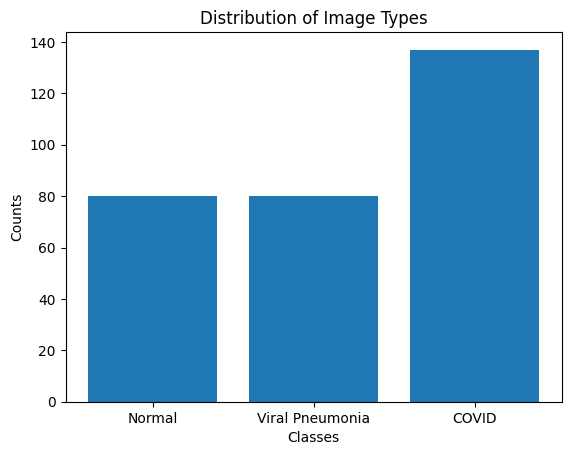

In [ ]:
counts = {
    'Normal': len(np.where(total_image == 0)[0]),                              # Calculating the count of Normal images
    'Viral Pneumonia': len(np.where(total_image == 1)[0]),                     # Calculating the count of Viral Pneumonia images
    'COVID': len(np.where(total_image == 2)[0])                                # Calculating the count of COVID images
}

# Extract class labels and corresponding counts
class_labels = list(counts.keys())
class_counts = list(counts.values())

# Create the bar plot
plt.bar(class_labels, class_counts)
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Distribution of Image Types');

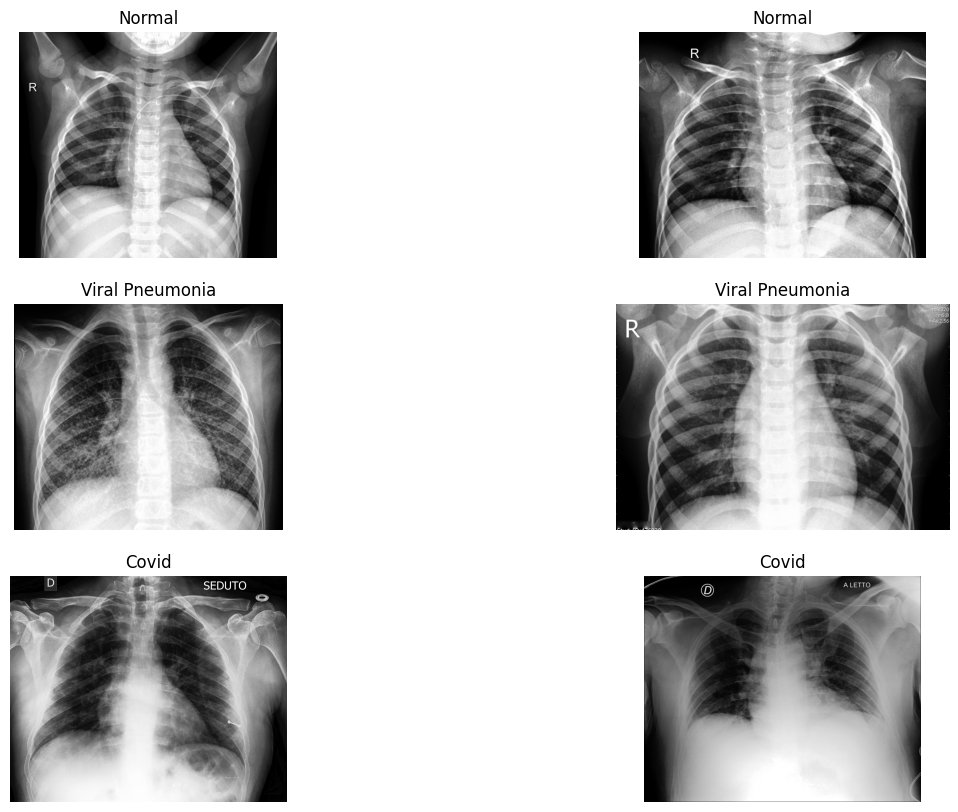

In [ ]:
def image_plot(generator, images_per_class):
    # Get the mapping of class names to indices
    class_indices = generator.class_indices
    # Extract the class names from the indices
    class_names = list(class_indices.keys())

    # Create a figure to display the images
    plt.figure(figsize=(15, 10))

    # Loop through each class index and its corresponding class name
    for class_idx, class_name in enumerate(class_names):
        # Get the indices of images belonging to the current class
        class_indices = [i for i, value in enumerate(generator.classes) if value == class_idx]
        # Select a subset of indices for the current class based on 'images_per_class'
        selected_indices = class_indices[:images_per_class]

        # Loop through the selected indices and display the images
        for i, idx in enumerate(selected_indices):
            # Create a subplot for each image
            ax = plt.subplot(len(class_names), images_per_class, class_idx * images_per_class + i + 1)
            # Load and display the image
            img = plt.imread(generator.filepaths[idx])
            plt.imshow(img)
            plt.title(class_name)
            plt.axis("off")

# Assuming 'train_data' is your image generator
images_per_class = 2
image_plot(train_data, images_per_class)
plt.show()

In [ ]:
# extracting the data from the zipped file
!pip install gdown -q
!gdown 1qKvgJrY2nB__6wiGAqNWa1ABU5kO5QkX
!unzip "X-raydata.zip"

# importing libraries
from IPython import display                                             # Enhanced interactive Python shell
import numpy as np                                                      # Numerical operations with arrays and matrices
import pandas as pd                                                     # Data manipulation and analysis library
import tensorflow as tf                                                 # framework that provides a wide range of tools and libraries for building and deploying machine learning models, particularly neural networks.
import os                                                               # It provides a way to interact with the file systems
import math                                                             # It is a built-in Python library that provides mathematical functions and utilities for numerical operations.

#Exploratory data analysis
import matplotlib.pyplot as plt                                         # library to create various types of visualizations, such as line plots, bar charts, histograms, and more.
import seaborn as sns                                                   # It is a data visualization library built on top of matplotlib, providing a high-level interface for creating attractive and informative statistical graphics
from tensorflow.keras.preprocessing.image import ImageDataGenerator     # It is a utility in TensorFlow for generating batches of image data with real-time data augmentation, including rescaling, resizing, rotation, and other transformations.
import cv2                                                              # It is a computer vision library that provides functions for image processing, such as reading, manipulating, and saving images
from PIL import ImageFilter                                             # It is part of the Python Imaging Library (PIL) and provides various image filters that can be applied to images, including blurring, sharpening, and edge enhancement.

#Model building
from tensorflow.keras.layers.experimental import preprocessing          # It is a module in TensorFlow that contains various preprocessing layers for data transformation and feature engineering in neural networks.
from sklearn.metrics import recall_score, confusion_matrix              # Libraries used for model evaluation


#Model deployment
!pip install gradio -q
import joblib                                                           # Library primarily used for saving and loading machine learning models.
import gradio as gr                                                     # Library for creating UIs for model deployment

#To generate reproducible results
import random as python_random                                          # to generate random data
np.random.seed(42)                                                      # setting the seed for Numpy random number generator
tf.random.set_seed(42)


# defining the dimensions of the images
height, width = 224, 224
# defining how many images to load in one go
batch_size=64

def generate_data(DIR):
    # ImageDataGenerator is a function from tensorflow to perform rescaling, resizing, rotation, and other transformations.
    datagen = ImageDataGenerator(rescale=1./255.)

    # flow from directory is used to generate batches of image data from a directory structure, allowing for efficient loading and preprocessing of image data during model training or evaluation.
    generator = datagen.flow_from_directory(
        DIR,
        batch_size=batch_size,
        shuffle=True,                                                          # shuffles the order of images while generation
        seed=42,
        class_mode='sparse',
        target_size=(height, width),
        classes={'Normal': 0, 'Viral Pneumonia': 1,'COVID': 2} # Make sure 'COVID' matches directory name
    )
    return generator

# defining the file path where training and testing images are stored
TRAINING_DIR = '/content/Data/train'
TESTING_DIR = '/content/Data/test'

# Verify the directories exist and contain images
print("Training Directory Contents:")
!ls {TRAINING_DIR}
print("\nTesting Directory Contents:")
!ls {TESTING_DIR}

train_data = generate_data(TRAINING_DIR)                                       # generate data for training
test_data = generate_data(TESTING_DIR)                                         # generate data for testing

total_image = np.concatenate([train_data.labels,test_data.labels])             # used to access the labels associated with the images
print("Total images:", len(total_image))


# defining the model
tf.keras.backend.clear_session()                                               # Clears the Keras session to remove any existing models or layers

input_shape = (height, width, 3)                                               # Defines the input shape for the model (height, width, number of channels)
base_model = tf.keras.applications.vgg16.VGG16(
    weights='imagenet',                                                        # Loads the pre-trained weights of the VGG16 model trained on ImageNet dataset
    include_top=False,                                                         # Excludes the top (fully connected) layers of the VGG16 model
    input_shape=input_shape
)
base_model.trainable = False                                                   # Freezes the weights of the VGG16 model to prevent further training

ai_model = tf.keras.Sequential()                                            # Creates a sequential model
ai_model.add(base_model)                                                    # Adds the VGG16 base model to the sequential model
ai_model.add(tf.keras.layers.GlobalAveragePooling2D())                      # Adds a global average pooling layer

ai_model.add(tf.keras.layers.Flatten())                                     # Flattens the input for the subsequent fully connected
ai_model.add(tf.keras.layers.Dense(3, activation='softmax'))                # Adds the final fully connected layer with 3 units and softmax activation

ai_model.compile(loss='SparseCategoricalCrossentropy',                      # Specifies the loss function for trainin
              optimizer=tf.keras.optimizers.Adam(0.001),                       # Sets the optimizer (Adam) and learning rate
              metrics=['acc'])                                                 # Specifies the metrics to evaluate the model's performance
ai_model.summary()

import random
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
checkpoint = tf.keras.callbacks.ModelCheckpoint('model/ai_model_best.saved', monitor='acc', verbose=1, mode='max',save_best_only=True) # defines file path to save the best model weights, define accuracy metric, verbose display updates of the model and saves best model
early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min",restore_best_weights=True, patience=5)  #stops the model training if there is no improvement in metrics

callbacks_list = [checkpoint,early]

history = ai_model.fit(                                                     # Fit the model on training data
    train_data,                                                            # Training data generator
    validation_data = test_data,                                           # validation data generator
    epochs=25,                                                             # no of epochs to train the model
    shuffle=False,
    verbose=True,                                                          # Prints updates during training.
    callbacks=callbacks_list
)

#model accuracy
ytrain = np.array([])                                                          # Initialize an empty array for storing true labels of test data
xtrain = []                                                                    # Initialize an empty list for storing test data

for i in range(math.ceil(len(train_data.classes)/batch_size)):                 # Loop over test generator batches to extract test data and true labels
    xtrain.append(train_data[i][0])                                            # Append test data to xtest list
    ytrain= np.concatenate((ytrain,train_data[i][-1]))                         # Concatenate true labels to ytest array

xtrain = np.concatenate((xtrain),axis=0)                                       # Concatenate test data along the batch axis

ypred_prob_train =ai_model.predict(xtrain)                                  # Predict probabilities for the test data
ypred_train = np.argmax(ypred_prob_train,axis=1)                               # Predicted labels by selecting the class with the highest probability

model_train_score = recall_score(ytrain, ypred_train, average='macro')
print("Model Score on Train Data:", np.round(100*model_train_score, 2))

# Set the size of the figure for the heatmap
plt.figure(figsize=(6, 6))
# Compute the confusion matrix based on true and predicted labels
hm = sns.heatmap(confusion_matrix(ytrain,ypred_train), annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False,xticklabels=['Normal','Viral Penumonia','Covid'],yticklabels=['Normal','Viral Penumonia','Covid'])
hm.set(xlabel='Predicted labels') # Set the x-axis label for the heatmap
hm.set(ylabel='True label') # # Set the y-axis label for the heatmap

#model accuracy
ytest = np.array([])                                                           # Initialize an empty array for storing true labels of test data
xtest = []                                                                     # Initialize an empty list for storing test data

for i in range(math.ceil(len(test_data.classes)/batch_size)):                  # Loop over test generator batches to extract test data and true labels
    xtest.append(test_data[i][0])                                              # Append test data to xtest list
    ytest= np.concatenate((ytest,test_data[i][-1]))                            # Concatenate true labels to ytest array

xtest = np.concatenate((xtest),axis=0)                                         # Concatenate test data along the batch axis

ypred_prob_test =ai_model.predict(xtest)                                    # Predict probabilities for the test data
ypred_test = np.argmax(ypred_prob_test,axis=1)                                 # Predicted labels by selecting the class with the highest probability

model_test_score = recall_score(ytest, ypred_test, average='macro')
print("Model Score on test Data:", np.round(100*model_train_score, 2))

# Set the size of the figure for the heatmap
#plt.figure(figsize=(6, 6))
# Compute the confusion matrix based on true and predicted labels
#hm = sns.heatmap(confusion_matrix(ytest, ypred_test), annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False,xticklabels=['Normal','Viral Penumonia','Covid'],yticklabels=['Normal','Viral Penumonia','Covid'])
#hm.set(xlabel='Predicted labels') # Set the x-axis label for the heatmap
#hm.set(ylabel='True label') # # Set the y-axis label for the heatmap


# Confusion Matrix
cm = confusion_matrix(ytest, ypred_test)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Viral Pneumonia', 'COVID'],
            yticklabels=['Normal', 'Viral Pneumonia', 'COVID'])
plt.xlabel('Predicted labels')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

#Model Testing
import numpy as np
import math
from sklearn.metrics import recall_score, confusion_matrix

ytest = np.array([])
xtest = []

for i in range(math.ceil(len(test_data.classes)/batch_size)):
    xtest.append(test_data[i][0])
    ytest= np.concatenate((ytest,test_data[i][-1]))

xtest = np.concatenate((xtest),axis=0)

# Replace 'tuned_ai_model' with the actual model you want to use
ypred_prob = ai_model.predict(xtest)  # Assuming 'ai_model' is your trained model
ypred = np.argmax(ypred_prob,axis=1)

# Make sure 'ypred_test_tune' is defined or use the appropriate variable
model_test_score = recall_score(ytest, ypred,average='macro')  # Using 'ypred' instead of 'ypred_test_tune'
print("Model Score on Test Data:", np.round(100*model_test_score, 2), '\n\n')

plt.figure(figsize=(6, 6))
hm = sns.heatmap(confusion_matrix(ytest,ypred), annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Normal','Viral Penumonia','Covid'],yticklabels=['Normal','Viral Penumonia','Covid'])
hm.set(xlabel='Predicted_labels')
hm.set(ylabel='True_labels');

# path to the save the trained model
saved_model_path = "https://drive.google.com/file/d/1Xa6deImcw6y9zsXWpyd2gjaFISLskcGr/view?usp=drive_link"

# loading the saved model
covid_detector = joblib.load("https://drive.google.com/file/d/1Xa6deImcw6y9zsXWpyd2gjaFISLskcGr/view?usp=drive_link")

# saving the final model
joblib.dump(ai_model, saved_model_path)

# path to the save the trained model
saved_model_path = ("https://drive.google.com/file/d/1Xa6deImcw6y9zsXWpyd2gjaFISLskcGr/view?usp=drive_link")

# loading the saved model
covid_detector = joblib.load(saved_model_path)

# creating the deployment input interface
image = gr.Image()

# creating the deployment output interface
label = gr.Label(num_top_classes=3)

# defining the dimensions of the input image
height = 224
width = 224
dimensions = (width, height)

# defining the class names for predictions
class_names = {0: 'Normal', 1: 'Viral Pneumonia', 2: 'Covid'}

# define a function that will take the necessary inputs and make predictions
def predict_covid(image):
    # resizing the input image
    image = cv2.resize(image, dimensions, interpolation=cv2.INTER_LINEAR)
    image = image / 255.0
    # reshaping the image to match the model's input shape
    image = image.reshape((-1, 224, 224, 3))
    # making predictions using the loaded model
    prediction = covid_detector.predict(image).flatten()
    # formatting the results to return final results as class names
    return {class_names[i]: float(prediction[i]) for i in range(3)}

    # defining the structure of the deployment interface and how the components will interact
demo = gr.Interface(
    fn=predict_covid,
    inputs = image,
    outputs = label,
    title="COVID Detection",
    description= "This interface will predict whether a given patient is normal, has viral pneumonia, or has COVID based on chest X-ray scan provided.",
    allow_flagging="never"
)

# deploying the model
demo.launch(inline=False, share=True, debug=True)

# shutting down the deployed model
demo.close()







Downloading...
From (original): https://drive.google.com/uc?id=1qKvgJrY2nB__6wiGAqNWa1ABU5kO5QkX
From (redirected): https://drive.google.com/uc?id=1qKvgJrY2nB__6wiGAqNWa1ABU5kO5QkX&confirm=t&uuid=8aa700e9-e3e4-46b8-b74b-ddba49c8dd53
To: /content/X-raydata.zip
100% 147M/147M [00:02<00:00, 57.4MB/s]
Archive:  X-raydata.zip
replace Data/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename:   Preparing metadata (setup.py) ... done
  ERROR: Operation cancelled by user


ModuleNotFoundError: No module named 'gradio'